In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import os 
import collections
import pickle as pkl

In [2]:
DATA_PATH = '/N/slate/baotruon/marketplace/data'

In [3]:
graph = ig.Graph.Read_GML(os.path.join(DATA_PATH, 'follower_network.gml'))

In [4]:
n_humans = graph.vcount()

In [29]:
n_humans

10006

# Test sampling function

In [5]:
import infosys.utils as utils
import numpy as np

In [5]:
vertices = range(len(graph.vs)) #vertices index
indegs = graph.degree(vertices, mode='in', loops=False)

In [6]:
norm_indegs = [i/sum(indegs) for i in indegs]

In [7]:
filsample = utils.sample_with_prob_without_replacement(vertices, 1000, norm_indegs)
fil_degs = graph.degree(filsample, mode='in', loops=False)

In [8]:
np_sample = np.random.choice(vertices,1000,replace=False, p=norm_indegs)
np_degs = graph.degree(np_sample, mode='in', loops=False)

In [17]:
from scipy.stats import ks_2samp
ks_res = ks_2samp(fil_degs, np_degs)

How to interpret this result?

In [18]:
ks_res.statistic

0.073

In [13]:
import seaborn as sns

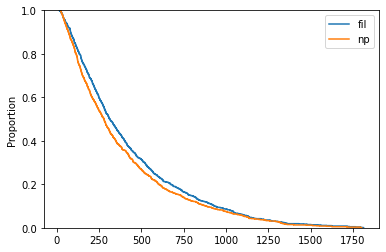

In [14]:
fig, ax = plt.subplots()
sns.ecdfplot(data=fil_degs, ax=ax, complementary=True, label='fil')
sns.ecdfplot(data=np_degs, ax=ax, complementary=True, label='np')
ax.legend()

In [9]:
from scipy.stats import ks_2samp

def ks_test(dist1, dist2, alpha=0.01, verbose=False):
    # for coefficient - alpha map, see https://sparky.rice.edu//astr360/kstest.pdf
    
    c_alphas=[1.22, 1.36, 1.48, 1.63, 1.73, 1.95]
    alphas=[0.1, 0.05, 0.025, 0.01, 0.005, 0.001]
    
    c_alpha = c_alphas[alphas.index(alpha)]
    
    ks_res = ks_2samp(dist1, dist2)
    
    #get critical value according to sample size
    
    critical_val = np.sqrt((len(dist1)+len(dist2))/(len(dist1)*len(dist2))) * c_alpha
    similar= ks_res.statistic < critical_val
    
    if verbose is True:
        print(ks_res)
        print('Statistic is smaller than critical value') if similar is True else print('Statistic is larger than critical value')

        print('The 2 distributions are similar: %s (At alpha %s, D=%s)' %(similar, alpha, np.round(critical_val,3)))
    return similar

In [43]:
ks_test(np_degs,fil_degs, alpha=0.01)

KstestResult(statistic=0.073, pvalue=0.00967775474446886)
Statistic is larger than critical value
The 2 distributions are similar: False (At alpha 0.01, D=0.073)


In [14]:
vertices = range(len(graph.vs)) #vertices index
indegs = graph.degree(vertices, mode='in', loops=False)
# get weights based on hubness
norm_indegs = [i/sum(indegs) for i in indegs]


test_results =[] #whether 2 distributions are similar
for i in range(10):
    filsample = utils.sample_with_prob_without_replacement(vertices, 1000, norm_indegs)
    fil_degs = graph.degree(filsample, mode='in', loops=False)
    np_sample = np.random.choice(vertices,1000,replace=False, p=norm_indegs)
    np_degs = graph.degree(np_sample, mode='in', loops=False)
    test_results += [ks_test(np_degs,fil_degs, alpha=0.01)]

In [13]:
test_results

[True, True, True, True, True, True, True, True, True, True]

# Degree distribution

## In vs out deg

In [4]:
vertices = range(len(graph.vs)) #vertices index
indegs = graph.degree(vertices, mode='in', loops=False)
outdegs = graph.degree(vertices, mode='out', loops=False)

Text(0.5, 1.0, 'Out degree vs In degree (follower network)')

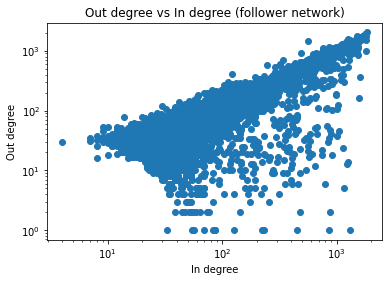

In [8]:
plt.scatter(indegs, outdegs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In degree')
plt.ylabel('Out degree')
plt.title('Out degree vs In degree (follower network)')

Text(0.5, 1.0, 'Out degree vs In degree (follower network)')

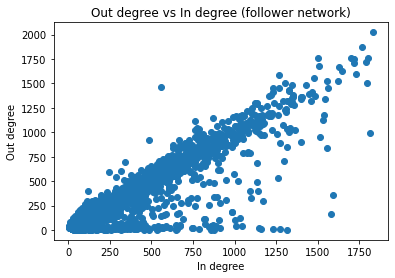

In [9]:
plt.scatter(indegs, outdegs)
plt.xlabel('In degree')
plt.ylabel('Out degree')
plt.title('Out degree vs In degree (follower network)')

In [26]:
def plot_degree_dist(graph, mode='in'):
    vertices = range(len(graph.vs)) #vertices index
    degs = graph.degree(vertices, mode=mode, loops=False)
    degs = dict(collections.Counter(degs))
    k_per_deg = dict(sorted(degs.items()))
    p_k = {deg: num/len(vertices) for deg,num in k_per_deg.items()}
    plt.scatter(p_k.keys(),p_k.values())
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('p_k')
    plt.xlabel('k')
    plt.title('Degree distribution (%s degree)' %mode)
    plt.show()

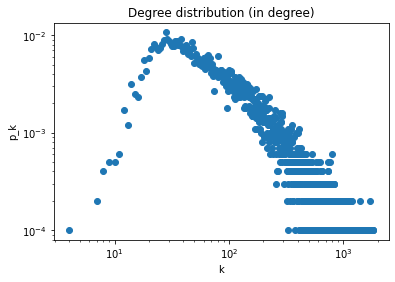

In [27]:
plot_degree_dist(graph, mode='in')

# Quality vs timestep

In [43]:
nohub = '../timestep_nohub.pkl'
hub = '../timestep_hub.pkl'

In [44]:
nohub_ts = pkl.load(open(nohub,'rb'))
hub_ts = pkl.load(open(hub,'rb'))

<function matplotlib.pyplot.show(close=None, block=None)>

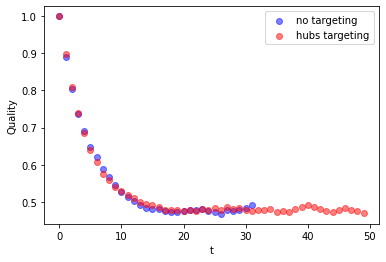

In [48]:
fix,ax = plt.subplots()
ax.scatter(range(len(nohub_ts)), nohub_ts, label='no targeting', color='blue', alpha=0.5)
ax.scatter(range(len(hub_ts)), hub_ts, label='hubs targeting', color='red', alpha=0.5)
# plt.title('Time step vs quality (%s targeting)' %targeting)
plt.legend()
plt.xlabel('t')
plt.ylabel('Quality')
plt.show

In [18]:
def plot_timestep(quality, targeting='none', log=False):
    plt.scatter(range(len(quality)), quality)
    plt.title('Time step vs quality (%s targeting)' %targeting)
    if log is True: plt.yscale('log')
    plt.xlabel('t')
    plt.ylabel('Quality')
    plt.show

## Ratio of humans vs bots 

In [34]:
ABS_PATH = "/N/u/baotruon/Carbonate/marketplace/exps"
# ABS_PATH = ''
# DATA_PATH = os.path.join(ABS_PATH, "data")
DATA_PATH = '/N/slate/baotruon/marketplace/data/igraph'

hub = os.path.join(DATA_PATH, 'vary_targetgamma/network_13.gml') #gamma 0.001 beta 0.01
nohub= os.path.join(DATA_PATH, 'vary_betagamma/network_gamma0.001.gml')#gamma 0.001 beta 0.02

In [35]:
hubnet = ig.Graph.Read_GML(hub)
nohubnet = ig.Graph.Read_GML(nohub)

plot the indegree vs out degree for humans where nodes are colored red if ratio of bots/humans that they follow is larger than 
probability  to retweet from bot is (1-mu)*numbot/numfriends

In [36]:
def get_bot_human_ratio(graph, mu=0.5):
    humans = [i.index for i in graph.vs if i['bot']==0]
    
    ratios=[]
    for agent in humans:
        friend_idxs = graph.successors(agent) #return those who the agent follows (list of int)
        bot_friends = [n.index for n in graph.vs if (n.index in friend_idxs) and (n['bot']==1)]
#         human_friends = [n.index for n in graph.vs if (n.index in friend_idxs) and (n['bot']==0)]
        ratios += [(len(bot_friends)/len(friend_idxs)) if len(friend_idxs)!=0 else 0]
    return ratios


In [37]:
def plot_bot_human_ratio(ax,graph,ratios,title=''):
    humans = [i.index for i in graph.vs if i['bot']==0]
    indegs = graph.degree(humans, mode='in', loops=False)
    ax.scatter(indegs, ratios, alpha=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('In degree')
    ax.set_ylabel('Bot/human ratio (%s)' %title)
    

In [9]:
ratio1 = get_bot_human_ratio(hubnet)
pkl.dump(ratio1, open('0413_bothums_hub.pkl', 'wb'))

In [10]:
ratio2 = get_bot_human_ratio(nohubnet)
pkl.dump(ratio2, open('0413_bothums_nohub.pkl', 'wb'))

## Run from here

In [15]:
ratio1 = pkl.load(open('0413_botfriends_hub.pkl', 'rb'))
ratio2  = pkl.load(open('0413_botfriends_nohub.pkl', 'rb'))

In [19]:
assert len(ratio1)==len(ratio2)

Plot for gamma 0.001 beta 0.01

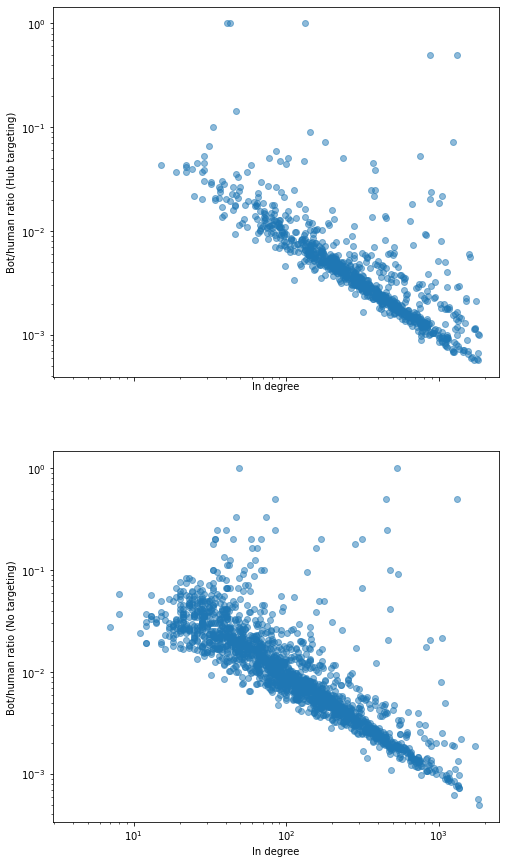

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, figsize=(8,15))
# ax1.scatter(range(len(ratio1)),ratio1)
plot_bot_human_ratio(ax1,hubnet,ratio1, title='Hub targeting')
plot_bot_human_ratio(ax2,nohubnet,ratio2, title='No targeting')

The bigger the hub is, the less bots they follow!! When there's no targeting, bots tend to concentrate in the low-mid range of degree.